In [1]:
# Importing the requied Libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
# Read the Dataframe
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:



numerical_df = df[list(df._get_numeric_data().columns)].reset_index(drop=True)
categorical_df = df[list(set(df.columns) - set(df._get_numeric_data().columns))].reset_index(drop=True)

print ("Number of numeric columns = {}".format(len(numerical_df)))
print ("Number of categorical columns = {}".format(len(categorical_df)))

Number of numeric columns = 45211
Number of categorical columns = 45211


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:

# This function to extract the descriptive stats of numerical features
def extractSummmary(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    #summary['Missing'] = df.isnull().sum().values    
    #summary['Missing %'] = (df.isnull().sum()/df.isnull().count()*100).values
    summary['Uniques'] = df.nunique().values
    summary['Uniques %'] = (df.nunique().values/df.count()*100).values
    summary['Median'] = df.median().values
    summary['Mean'] = df.mean().values
    summary['Max'] = df.max().values
    summary['Min'] = df.min().values    
    summary['std'] = df.std().values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 
    return summary


In [8]:

# This function to extract the descriptive stats of categorical features
def extractSummmaryCategory(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    #summary['Missing'] = df.isnull().sum().values
    #summary['Missing %'] = (df.isnull().sum()/df.isnull().count()*100).values

    summary['Uniques'] = df.nunique().values
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 
    return summary

In [9]:

summary_num =extractSummmary(numerical_df)
summary_num.sort_values('Uniques %',ascending=False).head(10)


,Name,dtypes,Uniques,Uniques %,Median,Mean,Max,Min,std,Entropy
1,balance,int64,7168,15.854549,448.0,1362.272058,102127,-8019,3044.765829,3.38
3,duration,int64,1573,3.479242,180.0,258.163080,4918,0,257.527812,2.80
5,pdays,int64,559,1.236425,-1.0,40.197828,871,-1,100.128746,0.66
0,age,int64,77,0.170313,39.0,40.936210,95,18,10.618762,1.60
4,campaign,int64,48,0.106169,2.0,2.763841,63,1,3.098021,0.77
6,previous,int64,41,0.090686,0.0,0.580323,275,0,2.303441,0.36
2,day,int64,31,0.068567,16.0,15.806419,31,1,8.322476,1.46


#### From above table entropy value is high for `balance`, `Duration`, `Age`, and `Day`


In [10]:

summary_cat =extractSummmaryCategory(categorical_df)
summary_cat


,Name,dtypes,Uniques,Entropy
0,education,object,4,0.49
1,poutcome,object,4,0.28
2,default,object,2,0.04
3,month,object,12,0.88
4,loan,object,2,0.19
5,marital,object,3,0.40
6,contact,object,3,0.35
7,Target,object,2,0.16
8,job,object,12,0.92
9,housing,object,2,0.30


#### In the categorical summary table Entropy is high for `Job`, `Month`, `Education`

In [13]:
# Create a new column named 'y_numeric' wherein we store numeric values of y-labels (target variable); 
# 1 for 'yes' and 0 for 'no'
df['y'] = np.where(df.Target == 'yes', 1,0)

In [15]:
df.drop('Target',axis = 1,inplace = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


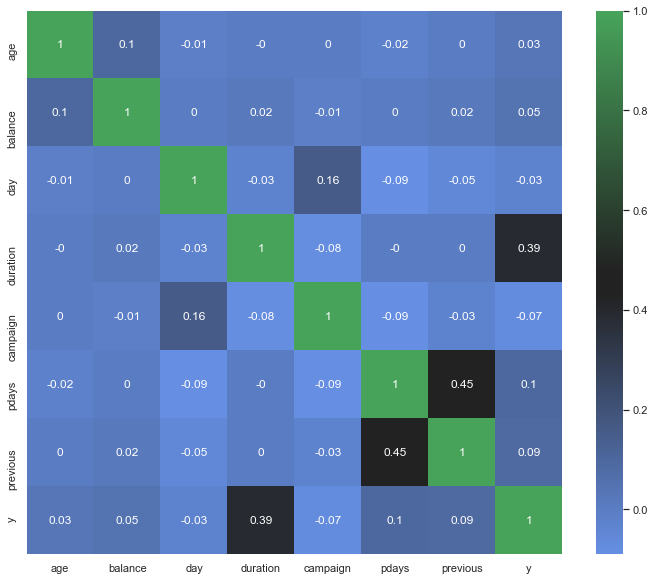

In [16]:
# Correlation Map
corr = df.corr()
sns.set(rc={'figure.figsize':(12,10)})
fig,ax = plt.subplots()
cmap = sns.diverging_palette(255, 133, l=60, n=7, center='dark' , as_cmap = True)
sns.heatmap(np.round(corr, 2), cmap = cmap, annot=True, annot_kws = {'fontsize':12})

In [17]:
corr.y

age         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
Name: y, dtype: float64

**After looking at the correlation numbers, it's evident that Last Call Duration seems to be fairly correlated to our target variable, which means more the time spent on the last call during the marketing campaign the better are the chances of that customer subscribing for long-term deposit account.**

## Exploratory Data Analysis

C:\Users\kiran kumar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kiran kumar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\kiran kumar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\kiran kumar\Anaconda3\lib\site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8ADE4BE10>,
      dtype=object)

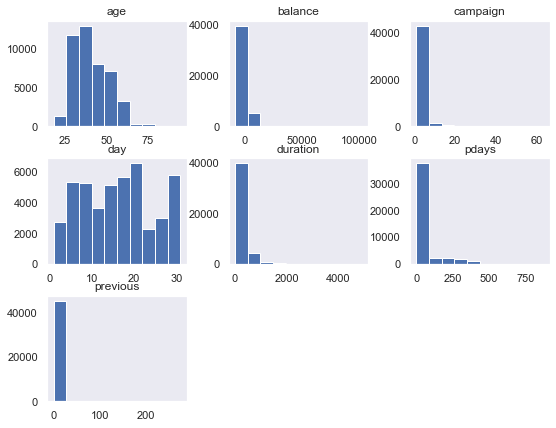

In [18]:
# Visualize the distribution of different continuous variables
numerical_df.hist(bins=10,figsize=(9,7),grid=False)

**We can see that most variables (all except 'age' and 'day') have their values skewed to one region.**

#### Let's visualize each of these continuous variables in greater depth. 
#### Let's start with 'balance', 'duration' and 'pdays' which indicate presence of Outliers.

### 1. Visualizing 'Balance'

Mean balance of Non-Subscribed customers is 1303.71
Mean balance of Subscribed customers is 1804.27


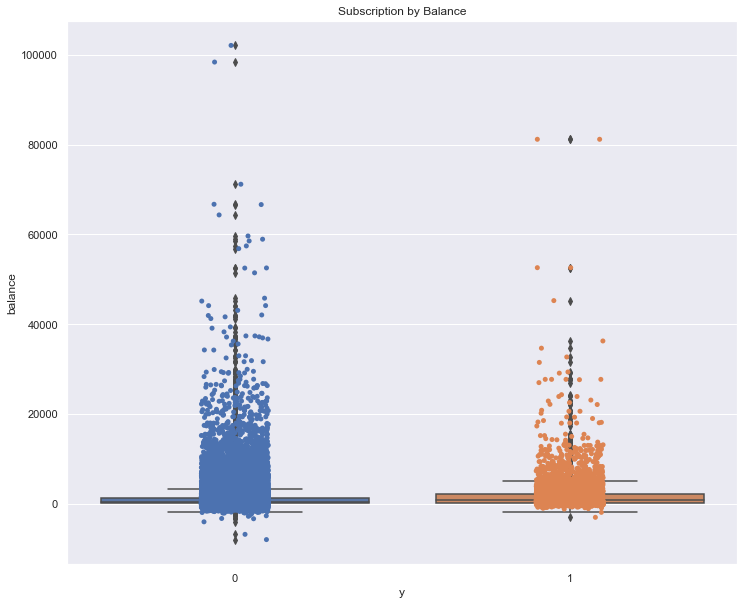

In [20]:
ax = sns.boxplot(x='y', y='balance', data=df)

ax = sns.stripplot(x='y', y='balance', data=df, jitter=True, edgecolor='gray')

ax.set_title('Subscription by Balance',fontsize=12)

print('Mean balance of Non-Subscribed customers is', np.round(df.balance[df.y == 0].mean(),2))
print('Mean balance of Subscribed customers is',np.round(df.balance[df.y == 1].mean(),2))

In [21]:
df[df.balance > 30000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,1
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,0
2778,45,management,married,tertiary,no,37378,yes,no,unknown,14,may,167,1,-1,0,unknown,0
3197,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,0
4851,35,self-employed,married,tertiary,no,35368,yes,no,unknown,21,may,63,1,-1,0,unknown,0
7156,58,retired,married,secondary,no,32948,no,no,unknown,29,may,364,2,-1,0,unknown,0
9425,59,housemaid,divorced,secondary,no,45141,no,no,unknown,6,jun,42,1,-1,0,unknown,0
9536,58,entrepreneur,married,primary,no,52499,no,no,unknown,6,jun,198,2,-1,0,unknown,0
12926,56,blue-collar,married,secondary,no,58932,no,no,telephone,7,jul,339,2,-1,0,unknown,0
13154,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,jul,325,1,-1,0,unknown,0


Both of these individuals did not subscribe to long-term deposits and have other atttributes such as 'y', 'pdays', 'previous', 'poutcome', 'marital status' same as about half other customers. So we can safely remove them from our 'balance' analysis.

In [22]:
outlier_balance_index = df[df.balance > 30000].index
data_without_outlier_balance = df.drop(df.index[outlier_balance_index])

Mean balance of Non-Subscribed customers is 1254.59
Mean balance of Subscribed customers is 1722.52


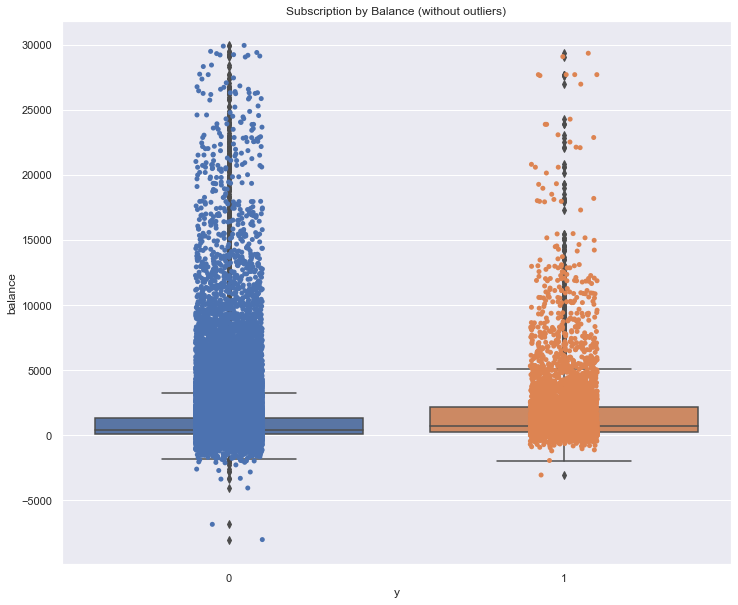

In [24]:
# let's visualize 'Balance' again

ax = sns.boxplot(x='y', y='balance', data=data_without_outlier_balance)

ax = sns.stripplot(x='y', y='balance', data=data_without_outlier_balance, jitter=True, edgecolor='gray')

ax.set_title('Subscription by Balance (without outliers)',fontsize=12)

print('Mean balance of Non-Subscribed customers is', np.round(data_without_outlier_balance.balance[data_without_outlier_balance.y == 0].mean(),2))
print('Mean balance of Subscribed customers is',np.round(data_without_outlier_balance.balance[data_without_outlier_balance.y == 1].mean(),2))

Mean balance of Non-Subscribed customers is 757.54
Mean balance of Subscribed customers is 1075.31


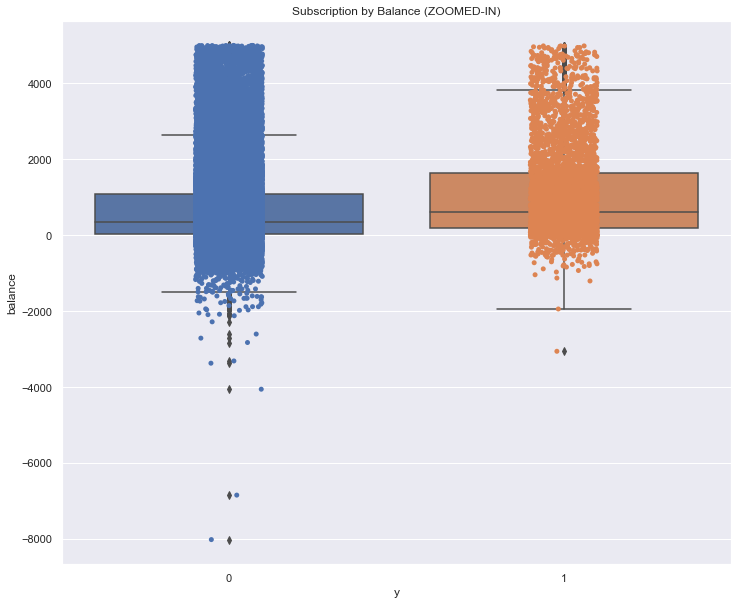

In [25]:
# Let's ZOOM-IN on our boxplots

zoomed_in_balance_index = df[df.balance > 5000].index
zoomed_in_balance_data = df.drop(df.index[zoomed_in_balance_index])

ax = sns.boxplot(x='y', y='balance', data=zoomed_in_balance_data)

ax = sns.stripplot(x='y', y='balance', data=zoomed_in_balance_data, jitter=True, edgecolor='gray')

ax.set_title('Subscription by Balance (ZOOMED-IN)',fontsize=12)

print('Mean balance of Non-Subscribed customers is', np.round(zoomed_in_balance_data.balance[zoomed_in_balance_data.y == 0].mean(),2))
print('Mean balance of Subscribed customers is',np.round(zoomed_in_balance_data.balance[zoomed_in_balance_data.y == 1].mean(),2))

**We can clearly see that the average account balance of the customers who subscribed to long-term deposits is HIGHER than those who didn't subscribe.**

### 2. Visualizing 'Duration'

Mean Last Call Duration of Non-Subscribed customers is 221.18
Mean Last Call Duration of Subscribed customers is 537.29


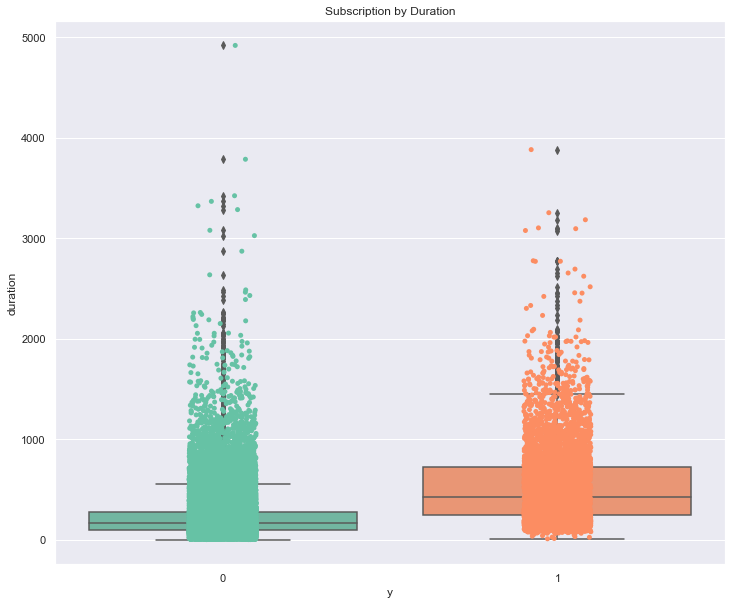

In [26]:
ax = sns.boxplot(x='y', y='duration', data=df, palette='Set2')

ax = sns.stripplot(x='y', y='duration', data=df, jitter=True, edgecolor='gray', palette='Set2')

ax.set_title('Subscription by Duration',fontsize=12)

print('Mean Last Call Duration of Non-Subscribed customers is', np.round(df.duration[df.y == 0].mean(),2))
print('Mean Last Call Duration of Subscribed customers is',np.round(df.duration[df.y == 1].mean(),2))

**It's quite evident that the average Last Call Duration for Subscribers is slight equal that of Non-subscribers.**
However there're some outliers among non-subscribers and subscribers, let's take a closer look at these and see if we can remove it from our analysis.

In [27]:
df[df.duration > 2000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
152,40,management,married,tertiary,no,-4,yes,no,unknown,5,may,2033,1,-1,0,unknown,0
1034,41,blue-collar,single,secondary,no,277,yes,no,unknown,7,may,2177,4,-1,0,unknown,0
1416,43,management,divorced,tertiary,no,388,yes,no,unknown,8,may,2087,2,-1,0,unknown,1
1731,41,blue-collar,married,primary,no,406,yes,no,unknown,9,may,2462,1,-1,0,unknown,0
1850,28,blue-collar,single,secondary,no,-197,yes,no,unknown,9,may,2016,2,-1,0,unknown,1
2386,45,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,-1,0,unknown,0
2404,34,blue-collar,divorced,secondary,no,383,yes,no,unknown,13,may,2231,1,-1,0,unknown,1
3135,43,technician,single,secondary,no,28,yes,no,unknown,14,may,2241,4,-1,0,unknown,0
4382,34,blue-collar,married,primary,no,183,yes,no,unknown,19,may,3078,4,-1,0,unknown,0
6451,44,services,divorced,secondary,no,51,yes,yes,unknown,27,may,3094,2,-1,0,unknown,1


In [28]:
outlier_duration_index = df[df.duration > 2000].index
data_without_outlier_duration = df.drop(df.index[outlier_duration_index])

Mean Last Call Duration of Non-Subscribed customers is 219.45
Mean Last Call Duration of Subscribed customers is 525.99


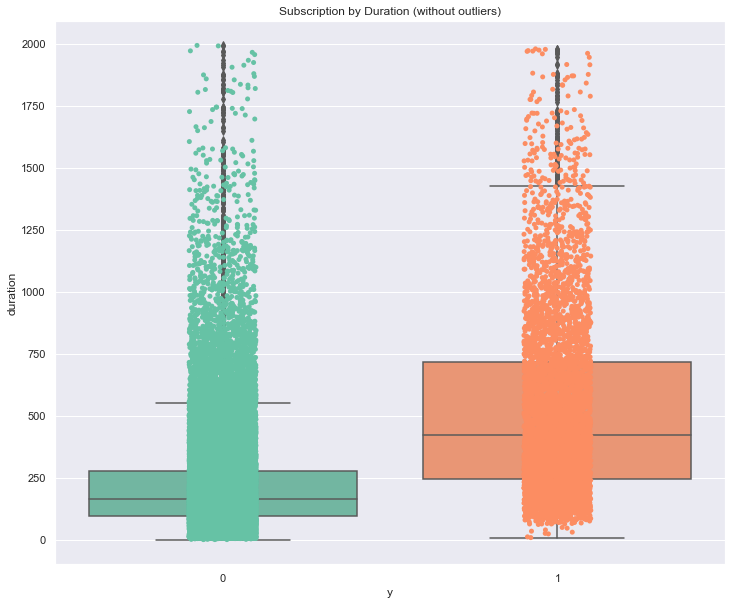

In [30]:
# let's visualize 'Duration' again

ax = sns.boxplot(x='y', y='duration', data=data_without_outlier_duration, palette='Set2')

ax = sns.stripplot(x='y', y='duration', data=data_without_outlier_duration, jitter=True, edgecolor='gray', palette='Set2')

ax.set_title('Subscription by Duration (without outliers)',fontsize=12)

print('Mean Last Call Duration of Non-Subscribed customers is', np.round(data_without_outlier_duration.duration[data_without_outlier_duration.y == 0].mean(),2))
print('Mean Last Call Duration of Subscribed customers is',np.round(data_without_outlier_duration.duration[data_without_outlier_duration.y == 1].mean(),2))

### 4.Visualizing 'Age'

Mean Age of Non-Subscribed customers is 40.84
Mean Age of Subscribed customers is 41.67


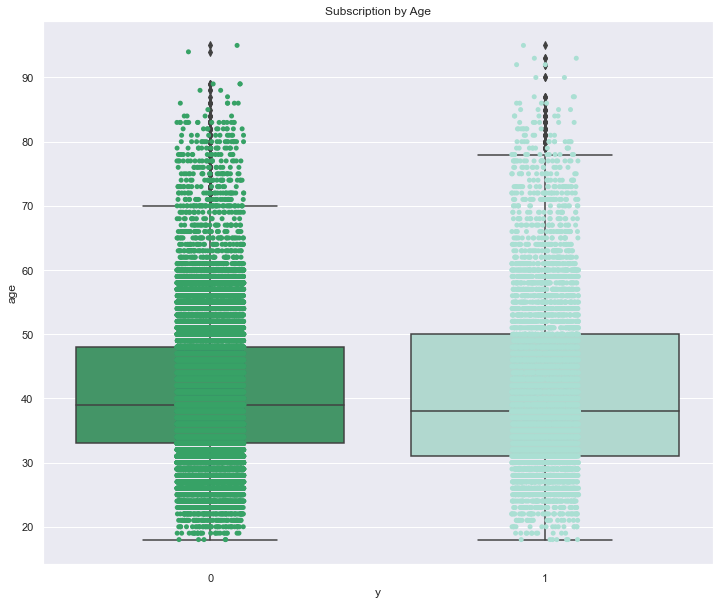

In [31]:
ax = sns.boxplot(x='y', y='age', data=df, palette='BuGn_r')

ax = sns.stripplot(x='y', y='age', data=df, jitter=True, edgecolor='gray', palette='BuGn_r')

ax.set_title('Subscription by Age',fontsize=12)

print('Mean Age of Non-Subscribed customers is', np.round(df.age[df.y == 0].mean(),2))
print('Mean Age of Subscribed customers is',np.round(df.age[df.y == 1].mean(),2))

### 5. Visualising 'Day'

In [34]:
print('Percentage among non-subscribers: ', ((df[(df.y == 0) & (df.day)].age.count())/(df[df.y == 0].day.count()))*100)
print('Percentage among subscribers: ', ((df[(df.y == 1) & (df.day)].age.count())/(df[df.y == 1].day.count()))*100)     

Percentage among non-subscribers:  49.85722158208507
Percentage among subscribers:  48.44015882019285


First five days with highest subscription percent:
 1     27.95
10    23.09
30    17.31
22    17.02
3     16.50
Name: day, dtype: float64


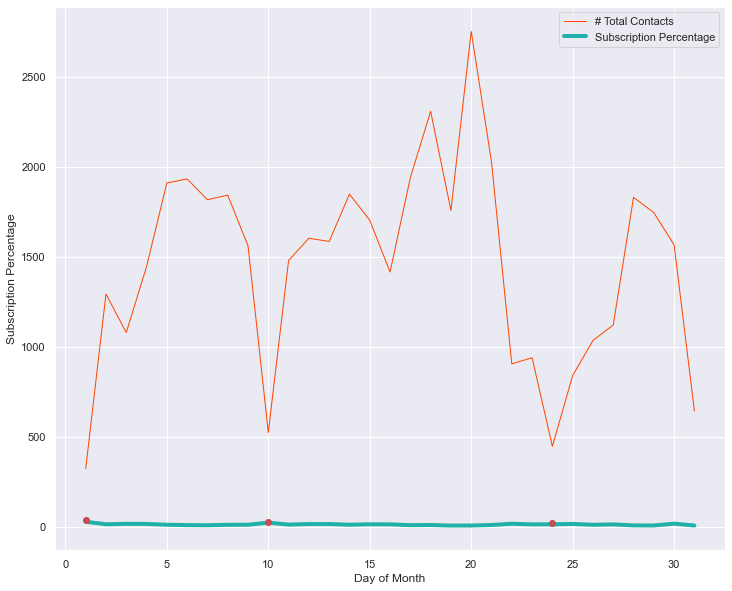

In [36]:
# Calculate day-wise total no. of contacts and day-wise total no. of subscriptions
daywise_contacts = df[df.y == 1].day.value_counts() + df[df.y == 0].day.value_counts()

#daywise_subscriptions = df[df.y == 1].day.value_counts()
daywise_subscription_percent = np.round(((df[df.y == 1].day.value_counts())/(df[df.y == 1].day.value_counts() + df[df.y == 0].day.value_counts()))*100, 2)
print('First five days with highest subscription percent:\n', daywise_subscription_percent.sort_values(ascending=False).head())

# Plot 'daywise_subscribers' and 'daywise_subscription_ratio' for different days of the month
sns.set(rc={'figure.figsize':(12,10)})
fig, ax = plt.subplots()
ax = sns.lineplot(data=daywise_contacts, palette="tab10", linewidth=1, color='orangered', label='# Total Contacts')
ax = sns.lineplot(data=daywise_subscription_percent, palette="tab10", linewidth=4, color='lightseagreen', label='Subscription Percentage')
ax.set(xlabel='Day of Month', ylabel='Subscription Percentage')
ax.legend(loc='best')

# Highlight the top 3 data points
ax.plot((1), (37.04), 'o', color='r')
ax.plot((10), (28.00), 'o', color='r')
ax.plot((24), (22.22), 'o', color='r')

### Visualizing 'Marital Status'

[Text(0.5, 1.0, 'Proportion of Subscribers across Marital Status')]

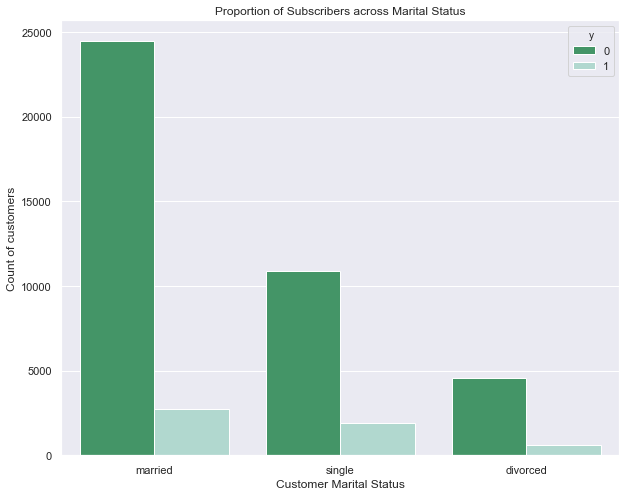

In [37]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='marital', hue='y', palette='BuGn_r', data=df)
ax.set(xlabel='Customer Marital Status', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across Marital Status')

A large fraction of the customers are married, followed by 'single' customers.
However, the proportion of Subscribers is fairly uniform across all.

#### Visualizing 'Educational Background'

[Text(0.5, 1.0, 'Proportion of Subscribers across Educational Background')]

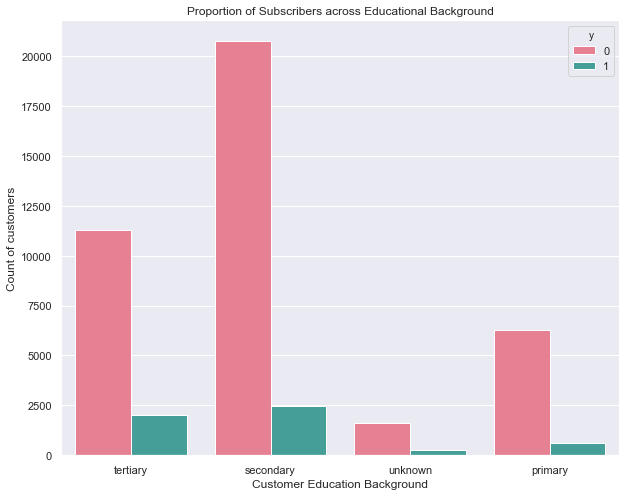

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='education', hue='y', palette='husl', data=df)
ax.set(xlabel='Customer Education Background', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across Educational Background')

Customers with Secondary and Tertiary education comprise the bulk of the data.
The distribution of subscribers is fairly uniform across these categories.

#### Visualizing 'Customer Profession'

[Text(0.5, 1.0, 'Proportion of Subscribers across customer profession')]

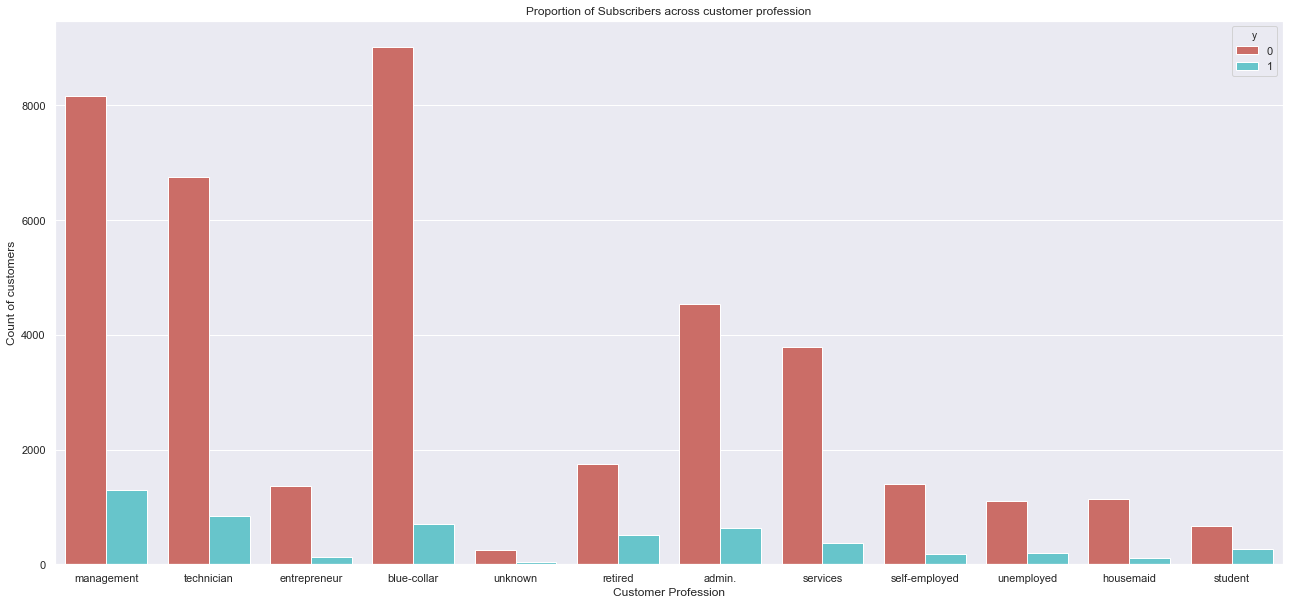

In [39]:
sns.set(rc={'figure.figsize':(22,10)})
fig, ax = plt.subplots()
ax = sns.countplot(x='job', hue='y', palette='hls', data=df)
ax.set(xlabel='Customer Profession', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers across customer profession')

Customers in management, blue-collar and technician jobs comprise over 50% of all customers.
The proportion of subscribers is pretty much equal across customers of all job type.

### Visualizing 'Housing Loan'

[Text(0.5, 1.0, 'Proportion of Subscribers among customers with/out Housing Loan')]

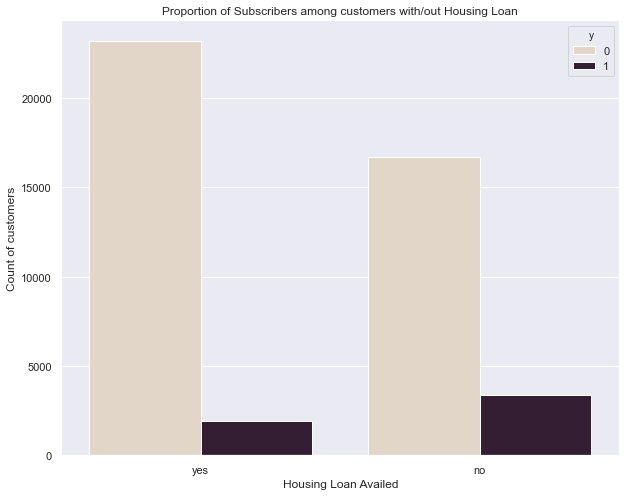

In [40]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='housing', hue='y', palette='ch:.25', data=df)
ax.set(xlabel='Housing Loan Availed', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers among customers with/out Housing Loan')

There's a fair distribution of customers among those who have availed Housing loan and those who haven't.
The proportion of Subscribers among those who don't have a housing loan is GREATER THAN those who have a housing loan.

###  Visualizing 'Personal Loan'

[Text(0.5, 1.0, 'Proportion of Subscribers among customers with/out Housing Loan')]

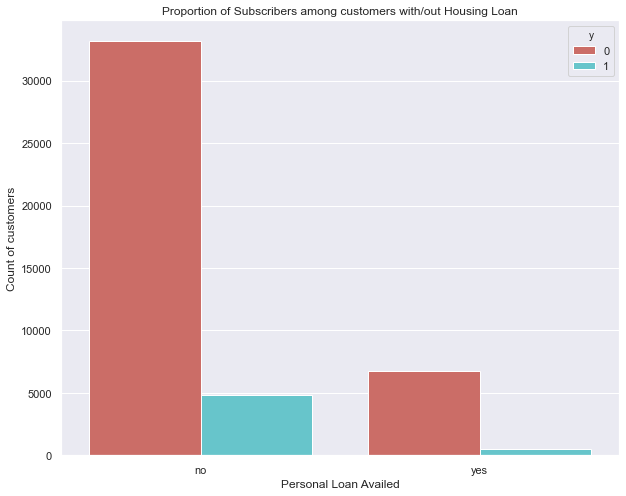

In [41]:
sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots()
ax = sns.countplot(x='loan', hue='y', palette='hls', data=df)
ax.set(xlabel='Personal Loan Availed', ylabel='Count of customers')
ax.set(title='Proportion of Subscribers among customers with/out Housing Loan')

Bulk of our customers haven't availed of a personal loan. And the distribution of Subscribers is fairly same for the two categories of customers.

C:\Users\kiran kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kiran kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kiran kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kiran kumar\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


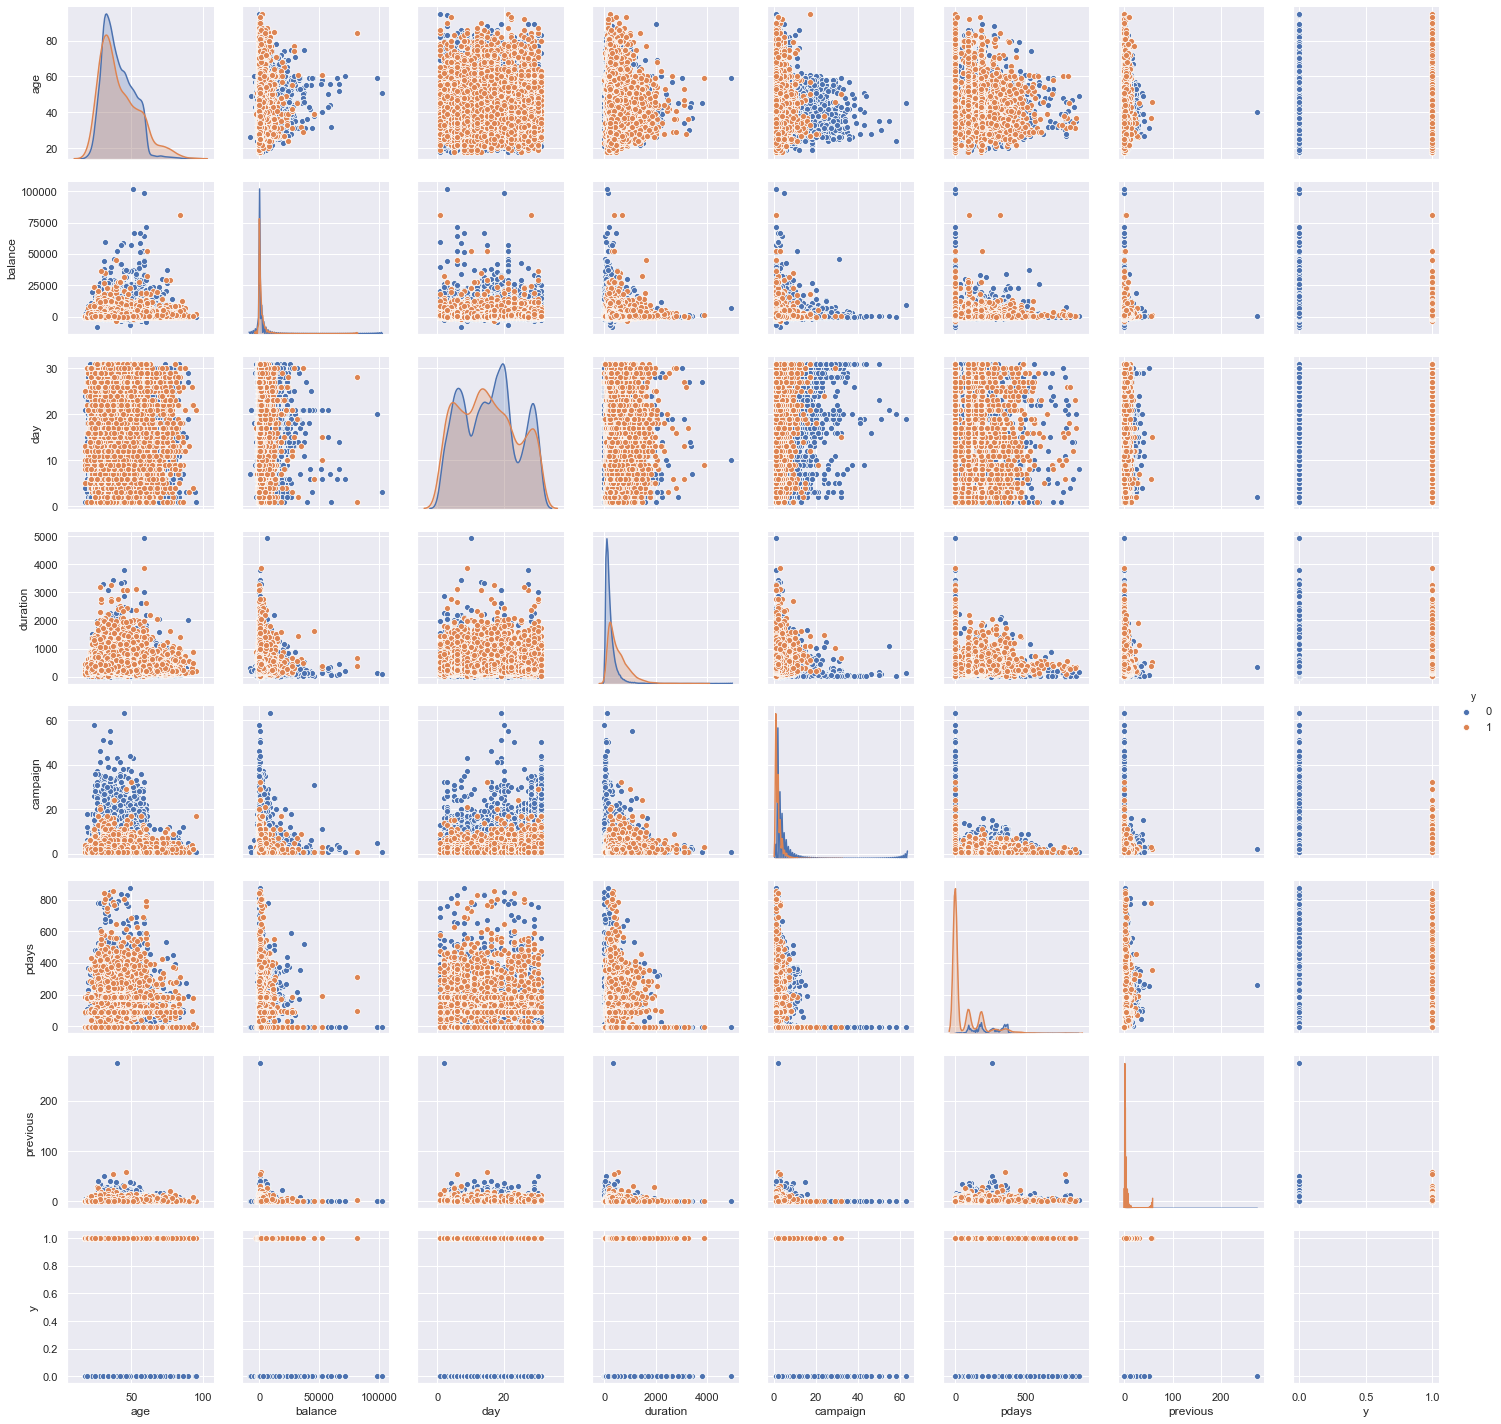

In [70]:
sns.pairplot(df,hue = 'y')

In [83]:
data.to_csv('final_data.csv')

## Feature Engineering

In [71]:
data = df.copy()


In [72]:

data['education']=data['education'].replace('unknown','secondary')
data['pdays']=data['pdays'].replace(-1,0)


In [73]:
X = data.drop('y',axis = 1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown
4,33,unknown,single,secondary,no,1,no,no,unknown,5,may,198,1,0,0,unknown


In [74]:
Xd= pd.get_dummies(X)
Xd.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [75]:
y = data['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

### Scaling the numerical features:

In [76]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xd_sc = sc.fit_transform(Xd)

In [78]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss


In [79]:

#Lets use train_test_split to split X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(Xd_sc, y, test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31647, 50) (13564, 50) (31647,) (13564,)


In [80]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier().fit(X_train,y_train)

In [81]:
print(classifier.feature_importances_)

[0.08651359 0.08655415 0.08806517 0.2253115  0.05785301 0.0247761
 0.01709981 0.01068515 0.00936579 0.00470224 0.00406974 0.01179998
 0.00704535 0.00592428 0.00796747 0.00560403 0.01244749 0.00576883
 0.00197956 0.00830025 0.01143547 0.01025523 0.0078658  0.01269384
 0.01111989 0.00142643 0.00147724 0.01111227 0.01313949 0.00631962
 0.00606181 0.00971909 0.00513771 0.01018478 0.01374161 0.00995163
 0.00465236 0.0079295  0.00553245 0.00850305 0.01206996 0.01200352
 0.009201   0.00808847 0.01193801 0.0093593  0.01061748 0.00664964
 0.05347613 0.01650375]


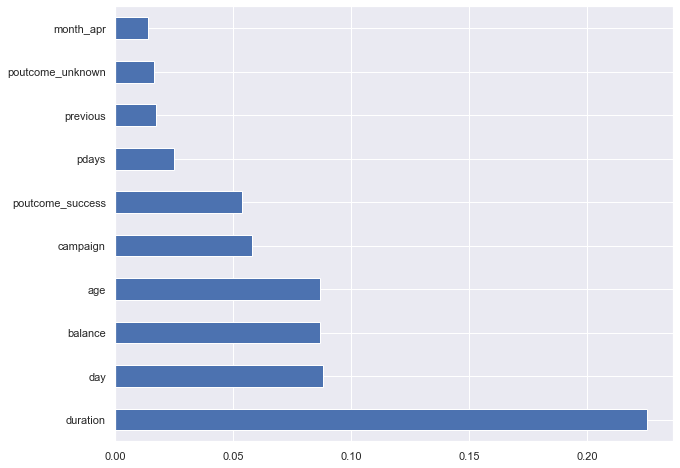

In [82]:
feature_imp = pd.Series(classifier.feature_importances_, index = Xd.columns)
feature_imp.nlargest(10).plot(kind = 'barh')
plt.show()